# Welcome to pystardog

Press the Restart & Run All button to run all the cells in this notebook and view the output.

In [1]:
import io
import stardog
import pandas as pd
import seaborn as sns

## Specify Stardog connection details

In [2]:
connection_details = {
  'endpoint': 'http://localhost:5820',
  'username': 'admin',
  'password': 'admin'
}

## Create a new database in Stardog

Drop the database if it already exists.

In [3]:
database_name = 'pystardog-tutorial'

with stardog.Admin(**connection_details) as admin:
    if database_name in [db.name for db in admin.databases()]:
        admin.database(database_name).drop()
    db = admin.new_database(database_name)

## Connect to the Stardog database

In [4]:
conn = stardog.Connection(database_name, **connection_details)

## Load the sample data
### Start a transaction

In [5]:
conn.begin()

'7e13b1d8-1848-40e5-aac6-9888b914d275'

### Add the database schema and data

Download the files to the same directory as this notebook.

[Schema](https://github.com/stardog-union/stardog-tutorials/raw/master/music/music_schema.ttl)

[Data](https://github.com/stardog-union/stardog-tutorials/raw/master/music/music.ttl.gz)

In [6]:
conn.add(stardog.content.File('music_schema.ttl'))

In [7]:
conn.add(stardog.content.File('music.ttl.gz'))

In [8]:
conn.commit() # commit the transaction

## Query the database

This query finds out how many albums there are for each year in the dataset.

In [9]:
query = """
SELECT ?year (COUNT(?s) as ?num_albums) WHERE {
  ?s a <http://stardog.com/tutorial/Album> ;
    <http://stardog.com/tutorial/date> ?date .
  BIND(year(?date) as ?year)
}
GROUP BY ?year"""

csv_results = conn.select(query, content_type='text/csv')
df = pd.read_csv(io.BytesIO(csv_results))
df

,year,num_albums
0,1956,2
1,1957,3
2,1959,3
3,1960,1
4,1961,2
5,1962,3
6,1963,7
7,1964,18
8,1965,16
9,1966,12


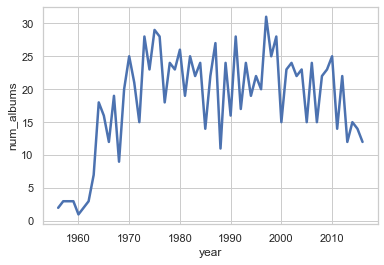

In [10]:
sns.set(style="whitegrid")

sns.lineplot(x=df['year'], y=df['num_albums'], palette="tab10", linewidth=2.5)

### Clean up the connection

Normally you would use a `with statement` similar to line 3.

In [11]:
conn.__exit__()